In [1]:
import numpy as np
import matplotlib.pyplot as plt
from core.ode import define_vqs_ode, define_schrodinger_ode
from core.integrators import euler, rk4
from core.variational_simulation import trial_state_ising, R_k_matrix
from core.utils import infidelity
from core.schrodinger import state_evoluted
from core.schrodinger import time_evolution, state_evoluted
import scipy.linalg as la
from core.utils import parse_gate

# 2 qubits

In [2]:
J = 1/2
B = 1/2
fs = [[-1j*J], [-1j*B, -1j*B]]
params_init = np.array([1.0, 1.0])
ops = [["ZZ"], ["XI", "IX"]]

hs = [-2.0*J, -B, -B] # Hamiltonian non-dependent on time
# hs = lambda t: [-2*J*np.cos(t), -B*np.cos(t), -B*np.sin(t)] # Hamiltonian parameters dependent on time # FAKE DATA FTW

opsH = ["ZZ", "XI", "IX"]

state = np.ones(4, dtype=complex)/2
state_vqe = state

# Time discretization
dt = 1e-3
Nt = int(2.0*1e3/(2.0*np.pi))

In [3]:
ode_an = define_vqs_ode(ops, opsH, fs, hs, state_vqe, analytic=True)    # Define the diff. equation RHS as a function of the parameters
params_evolved_an = euler(ode_an, params_init, dt, Nt)              # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)                # Integrate in time!

Text(0.5, 1.0, 'Analytic')

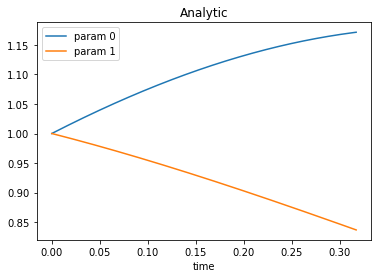

In [4]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved_an, label = [f"param {i}" for i in range(params_evolved_an.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Analytic")

In [5]:
# Through the circuit

ode_sim = define_vqs_ode(ops, opsH, fs, hs, state_vqe)    # Define the diff. equation RHS as a function of the parameters
params_evolved_sim = euler(ode_sim, params_init, dt, Nt)  # Integrate in time!
# params_evolved = rk4(ode, params_init, dt, Nt)    # Integrate in time!

Text(0.5, 1.0, 'Circuit')

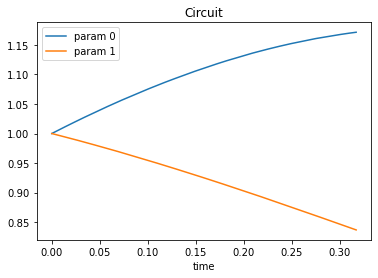

In [6]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved_sim, label = [f"param {i}" for i in range(params_evolved_sim.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")
plt.title("Circuit")

In [7]:
Hz = R_k_matrix(params_init[0], fs[0], ops[0])
Hx = R_k_matrix(params_init[1], fs[1], ops[1])
initial_state_ising = Hx @ Hz @ state
initial_state_ising = initial_state_ising/np.linalg.norm(initial_state_ising)

In [8]:
# Solve the schrodinger equation using matrix exponentiation

analityc_evolution = state_evoluted(initial_state_ising, opsH, hs, dt, Nt, img=True)

In [9]:
# from params to the state psi(lambda)

params_to_state_an = trial_state_ising(params_evolved_an, state, fs, ops, Nt)
params_to_state_sim = trial_state_ising(params_evolved_sim, state, fs, ops, Nt)

Text(0.5, 1.0, 'Infidelity')

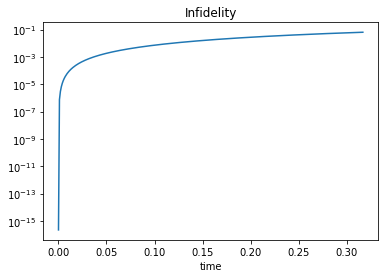

In [10]:
# Calculate infidelity from the analytic vqe with schrodinger equation solution using matrix exponentiation

inf_array_1 = infidelity(analityc_evolution, params_to_state_an)

plt.plot(dt*np.arange(Nt), inf_array_1)
plt.xlabel("time")
plt.yscale("log")

plt.title("Infidelity")

Text(0.5, 1.0, 'Infidelity')

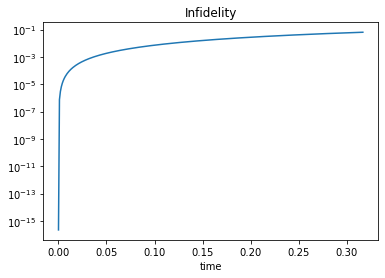

In [11]:
# Calculate infidelity from the circuit vqe with schrodinger equation solution using matrix exponentiation

inf_array_2 = infidelity(analityc_evolution, params_to_state_sim)

plt.plot(dt*np.arange(Nt), inf_array_2)
plt.xlabel("time")
plt.yscale("log")
plt.title("Infidelity")

In [12]:
max(inf_array_2)

0.0652714117370421

In [13]:
np.argmax(inf_array_2)

317